In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import pandas as pd
import h5py

In [2]:
infile1 = open ("qcd_100000_pt_1000_1200.pkl", 'rb')
qcd_dict = pickle.load(infile1)
print(qcd_dict.keys())

infile2 = open ("higgs_100000_pt_1000_1200.pkl", 'rb')
higgs_dict = pickle.load(infile2)
print(higgs_dict.keys())

qcd = np.array(qcd_dict)
higgs = np.array(higgs_dict)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


# Lab 7

## Problem 7.1

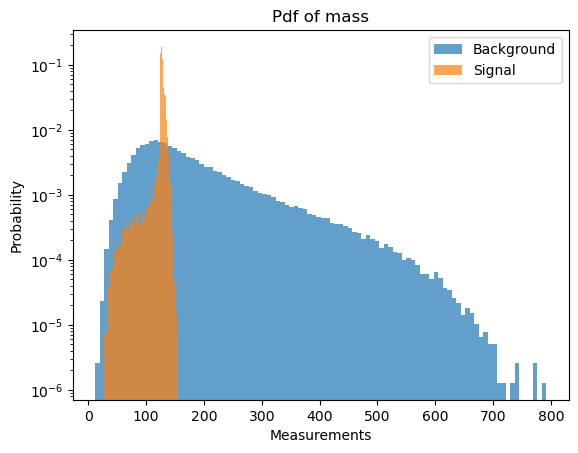

In [3]:
fig, ax = plt.subplots()
x = 3
title = higgs_dict.keys()[x]
ax.set_title("Pdf of " + str(title))
ax.hist(qcd[:,x], bins = 100, density = True, alpha = 0.7)
ax.hist(higgs[:,x], bins = 100, density = True, alpha = 0.7)
ax.legend(['Background', 'Signal'])
ax.set_xlabel('Measurements')
ax.set_ylabel('Probability')
plt.yscale('log')
plt.show()

In [135]:
mean = 2000
d = stats.poisson(mean)
probability = d.sf(2050)
sigma = stats.norm.ppf(1 - probability)
print('Sigma = ' + str(sigma))

approximation = 50/np.sqrt(2000)
print('Approximation = ' + str(approximation))

Sigma = 1.1282230087754423
Approximation = 1.118033988749895


The calculated sigma and approximated sigma are equivalent. Square root of N_qcd is the standard deviation of background distribution and I compared it with N_higgs to figure out the difference between them. This is basically the z-score equation where x - mean / standard deviation will give you the sigma of the distribution. Therefore, that is why the approximation is quite similar to the calculated sigma shown above.

## Problem 7.2

In [5]:
# Trial 1
mask_value = 100
difference = 100
h_mask = (higgs_dict['mass'] > mask_value) & (higgs_dict['mass'] < mask_value + difference)
h_cut = higgs_dict['mass'][h_mask]
h_mean = h_cut.size / 2000
print(h_mean)
q_mask = (qcd_dict['mass'] > mask_value) & (qcd_dict['mass'] < mask_value + difference)
q_cut = qcd_dict['mass'][q_mask]
q_mean = q_cut.size / 50
print(q_mean)

approximation = h_mean / np.sqrt(q_mean)
print('Approximation = ' + str(approximation))

49.0285
1017.52
Approximation = 1.537011543763161


In [6]:
higgs_dict['mass'].max()

154.6136749993263

In [7]:
def cut (key ,lower, upper):
    h_mask = (higgs_dict[key] > lower) & (higgs_dict[key] < upper)
    h_cut = higgs_dict[key][h_mask]
    h_mean = h_cut.shape[0] / 2000
    q_mask = (qcd_dict[key] > lower) & (qcd_dict[key] < upper)
    q_cut = qcd_dict[key][q_mask]
    q_mean = q_cut.shape[0] / 50

    approximation = h_mean / np.sqrt(q_mean)
    # print('Approximation = ' + str(approximation))
    return approximation

In [8]:
def signal_cut (key):
    max_value = higgs_dict[key].max()
    min_value = higgs_dict[key].min()
    cut_list = []
    cut_valueList = []
    max_modified = max_value
    min_modified = min_value
    max_range = max_value
    min_range = min_value
    trigger = 0
    if (max_value < 1) & (max_value > 0):
        max_modified = 1 / max_value
        min_range = max_modified
        trigger = 1
    if (min_value < 1) & (min_value > 0):
        min_modified = 1 / min_value
        max_range = min_modified
    
    for x in range(int(min_range), int(max_range)):
        if trigger == 1:
            i = 1 / x
        else:
            i = x
        # print('Cut = ' + str(i))
        cut_valueList.append(i)
        cut_list.append(cut(key, i, max_value))
    index = cut_list.index(max(cut_list))
    print('Min Cut = ' + str(cut_valueList[index]) + ' and Max Cut = ' + str(max_value))
    return max(cut_list)

In [9]:
signal_cut('mass')

Min Cut = 124 and Max Cut = 154.6136749993263


2.4972340425531914

From the cut loop above, I found that the cut of lower bound = 124.

In [10]:
variable = higgs_dict.keys()[3]
print(variable)
print('Expected Significance = ' + str(cut(variable, 124, 129)))

mass
Expected Significance = 4.267241718150673


The upper bound of 129 gives the highest expected signifance, which is 4.27.

## Problem 7.3

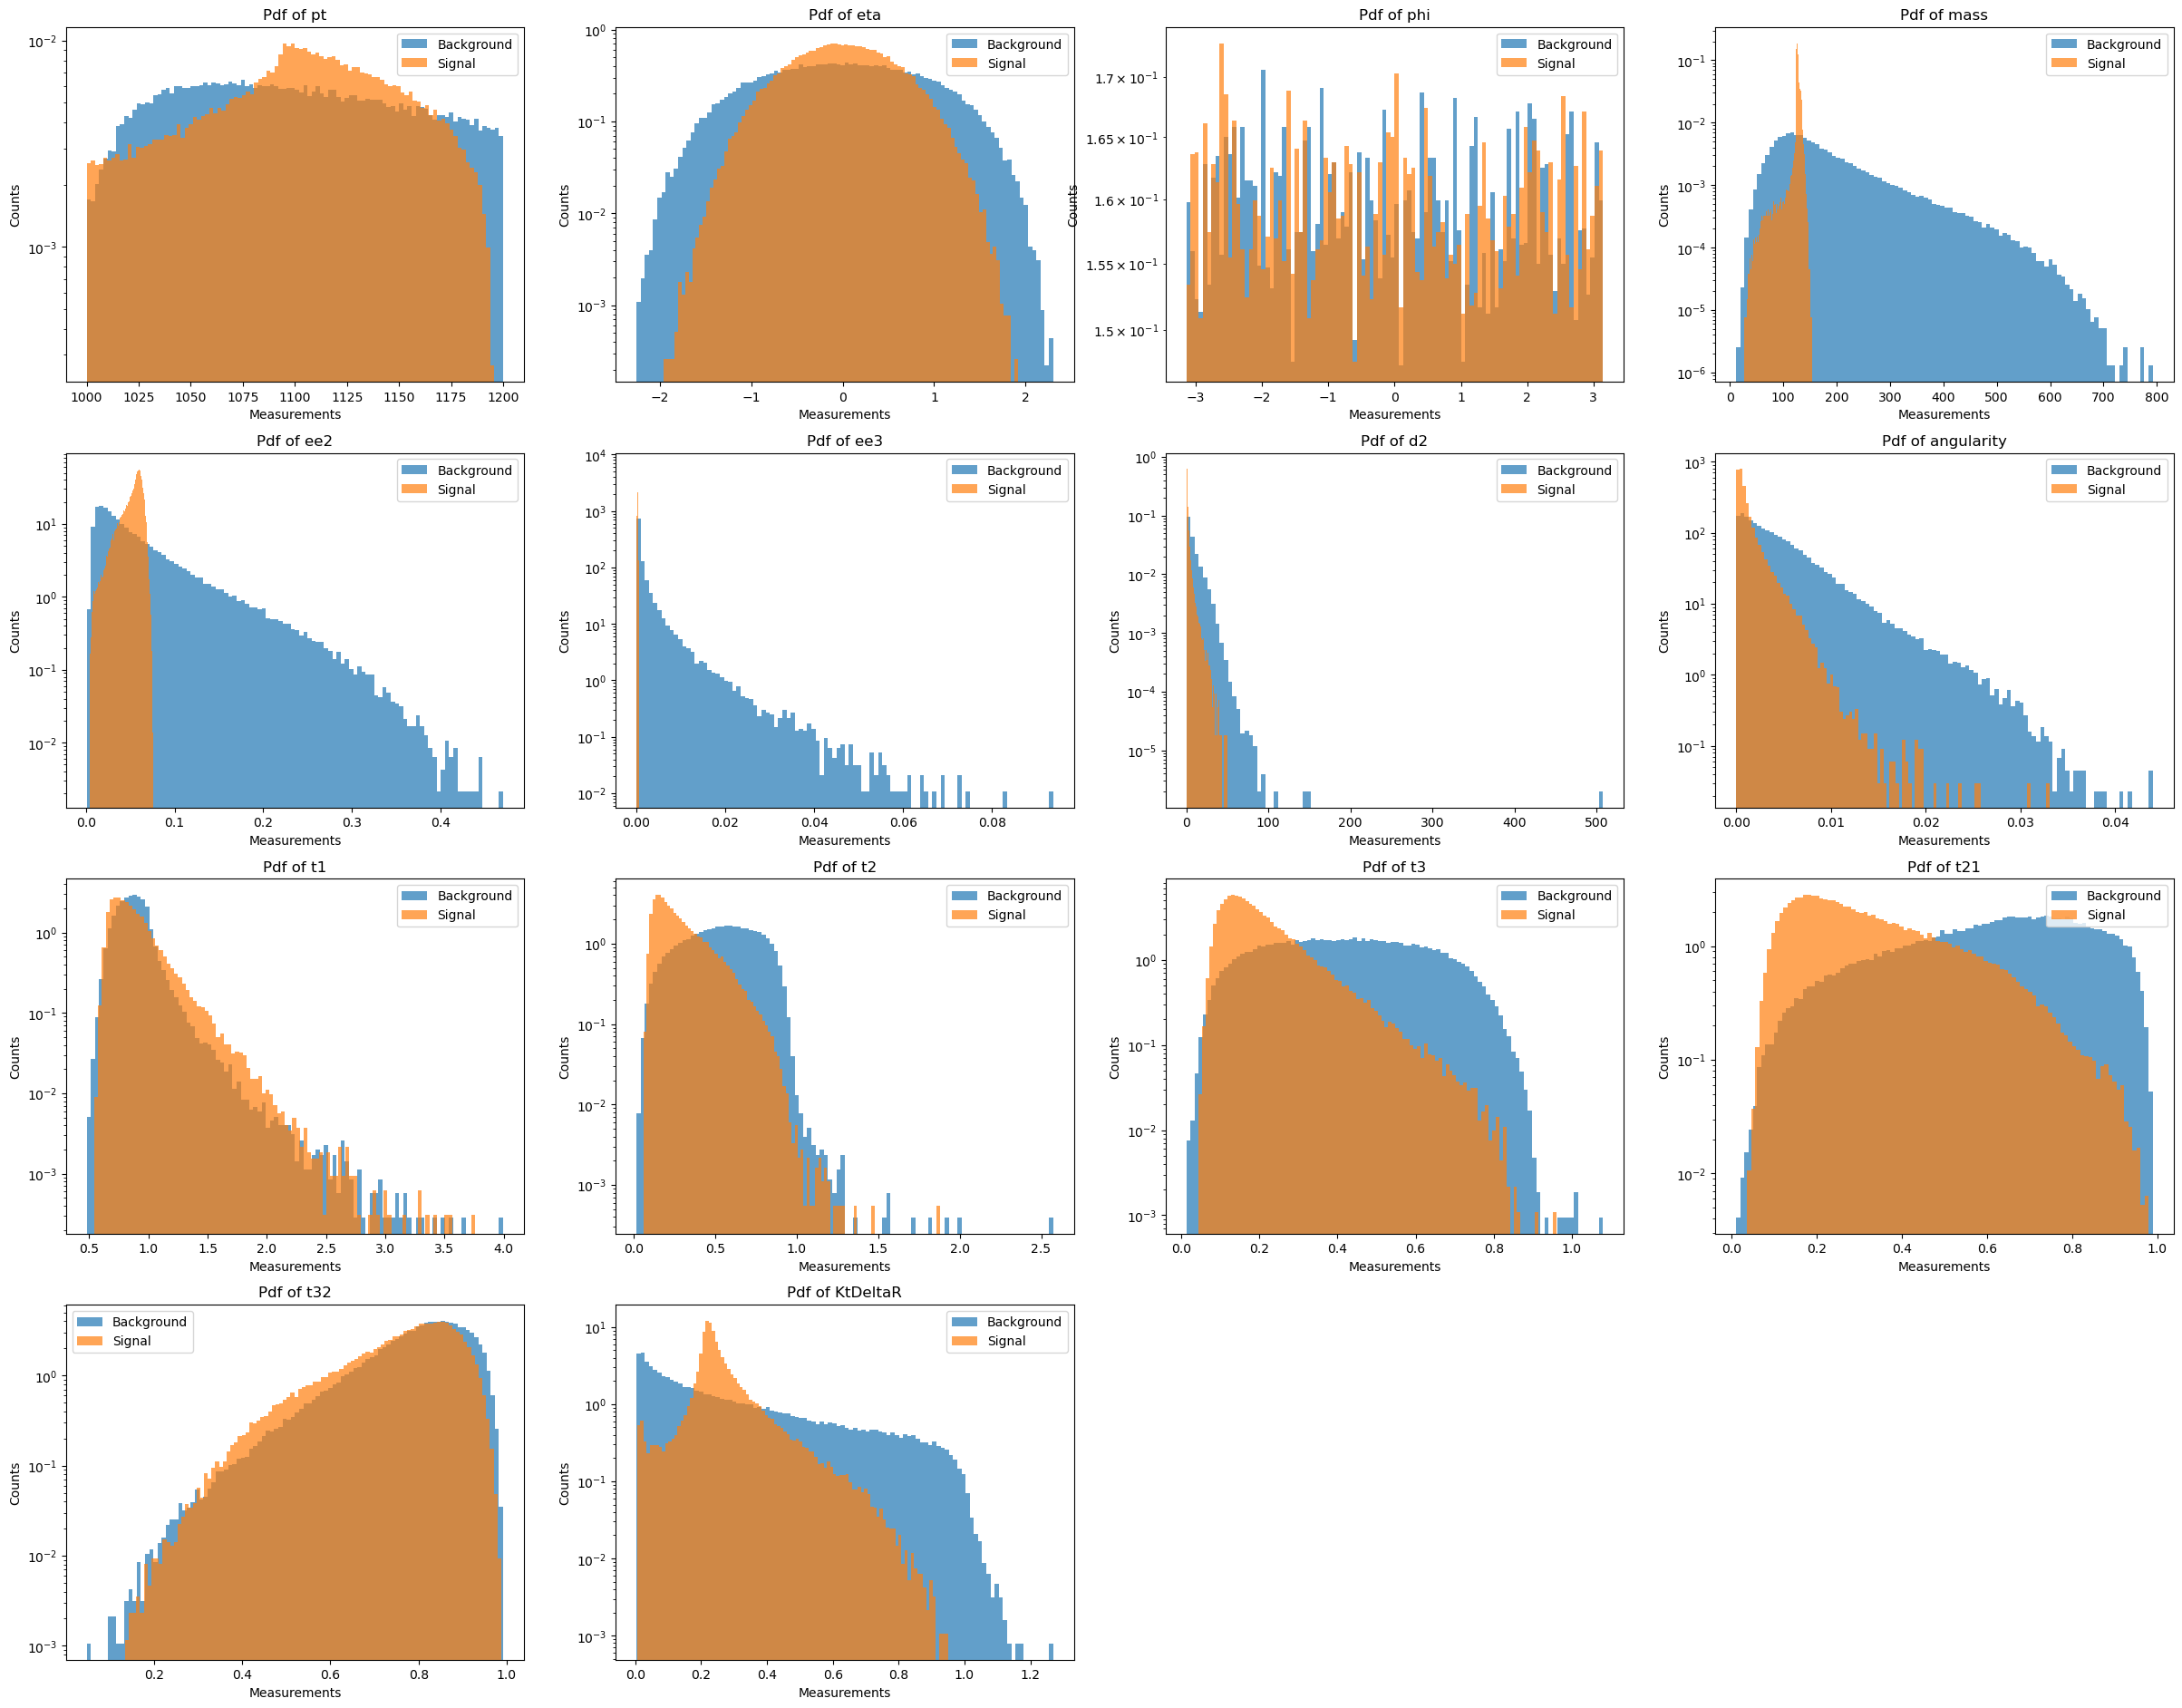

In [21]:
fig = plt.figure(figsize = (30, 60))
rows = 10
columns = 4
n = 1
lower = 124
upper = 155
for x in range(0, 14):
    fig.add_subplot(rows, columns, n)
    n = n + 1
    title = higgs_dict.keys()[x]
    plt.title("Pdf of " + str(title))
    plt.hist(qcd[:,x], bins = 100, density = True, alpha = 0.7)
    plt.hist(higgs[:,x], bins = 100, density = True, alpha = 0.7)
    plt.legend(['Background', 'Signal'])
    plt.xlabel('Measurements')
    plt.ylabel('Counts')
    plt.yscale('log')

In [12]:
variable = higgs_dict.keys()[0]
print(variable)
print('Expected Significance = ' + str(cut(variable, 1000, 1190)))

variable = higgs_dict.keys()[1]
print(variable)
print('Expected Significance = ' + str(cut(variable, -1, 1)))

variable = higgs_dict.keys()[2]
print(variable)
print('Expected Significance = ' + str(cut(variable, -3, 3)))

variable = higgs_dict.keys()[3]
print(variable)
print('Expected Significance = ' + str(cut(variable, 124, 129)))

variable = higgs_dict.keys()[4]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0.035, 0.069)))

variable = higgs_dict.keys()[5]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0.0001, 0.0004)))
variable = higgs_dict.keys()[6]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0, 1.5)))

variable = higgs_dict.keys()[7]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0, 0.0011)))

variable = higgs_dict.keys()[8]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0.5, 2.5)))

variable = higgs_dict.keys()[9]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0, 0.25)))

variable = higgs_dict.keys()[10]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0, 0.22)))

variable = higgs_dict.keys()[11]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0.01, 0.36)))

variable = higgs_dict.keys()[12]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0, 1)))

variable = higgs_dict.keys()[13]
print(variable)
print('Expected Significance = ' + str(cut(variable, 0.2, 0.27)))

pt
Expected Significance = 1.1333881037380027
eta
Expected Significance = 1.2092330121591606
phi
Expected Significance = 1.0922339594284554
mass
Expected Significance = 4.267241718150673
ee2
Expected Significance = 1.9251416531279362
ee3
Expected Significance = 1.864291530105164
d2
Expected Significance = 2.032278571762182
angularity
Expected Significance = 1.7659979277655817
t1
Expected Significance = 1.1178830761998504
t2
Expected Significance = 1.8206195045115352
t3
Expected Significance = 1.844287154307943
t21
Expected Significance = 1.8141800807419846
t32
Expected Significance = 1.118033988749895
KtDeltaR
Expected Significance = 2.0777121677163746


Through number of feature cuts, I still can't find any other feature that is as discriminative as mass. They are all below 4.27 significance.

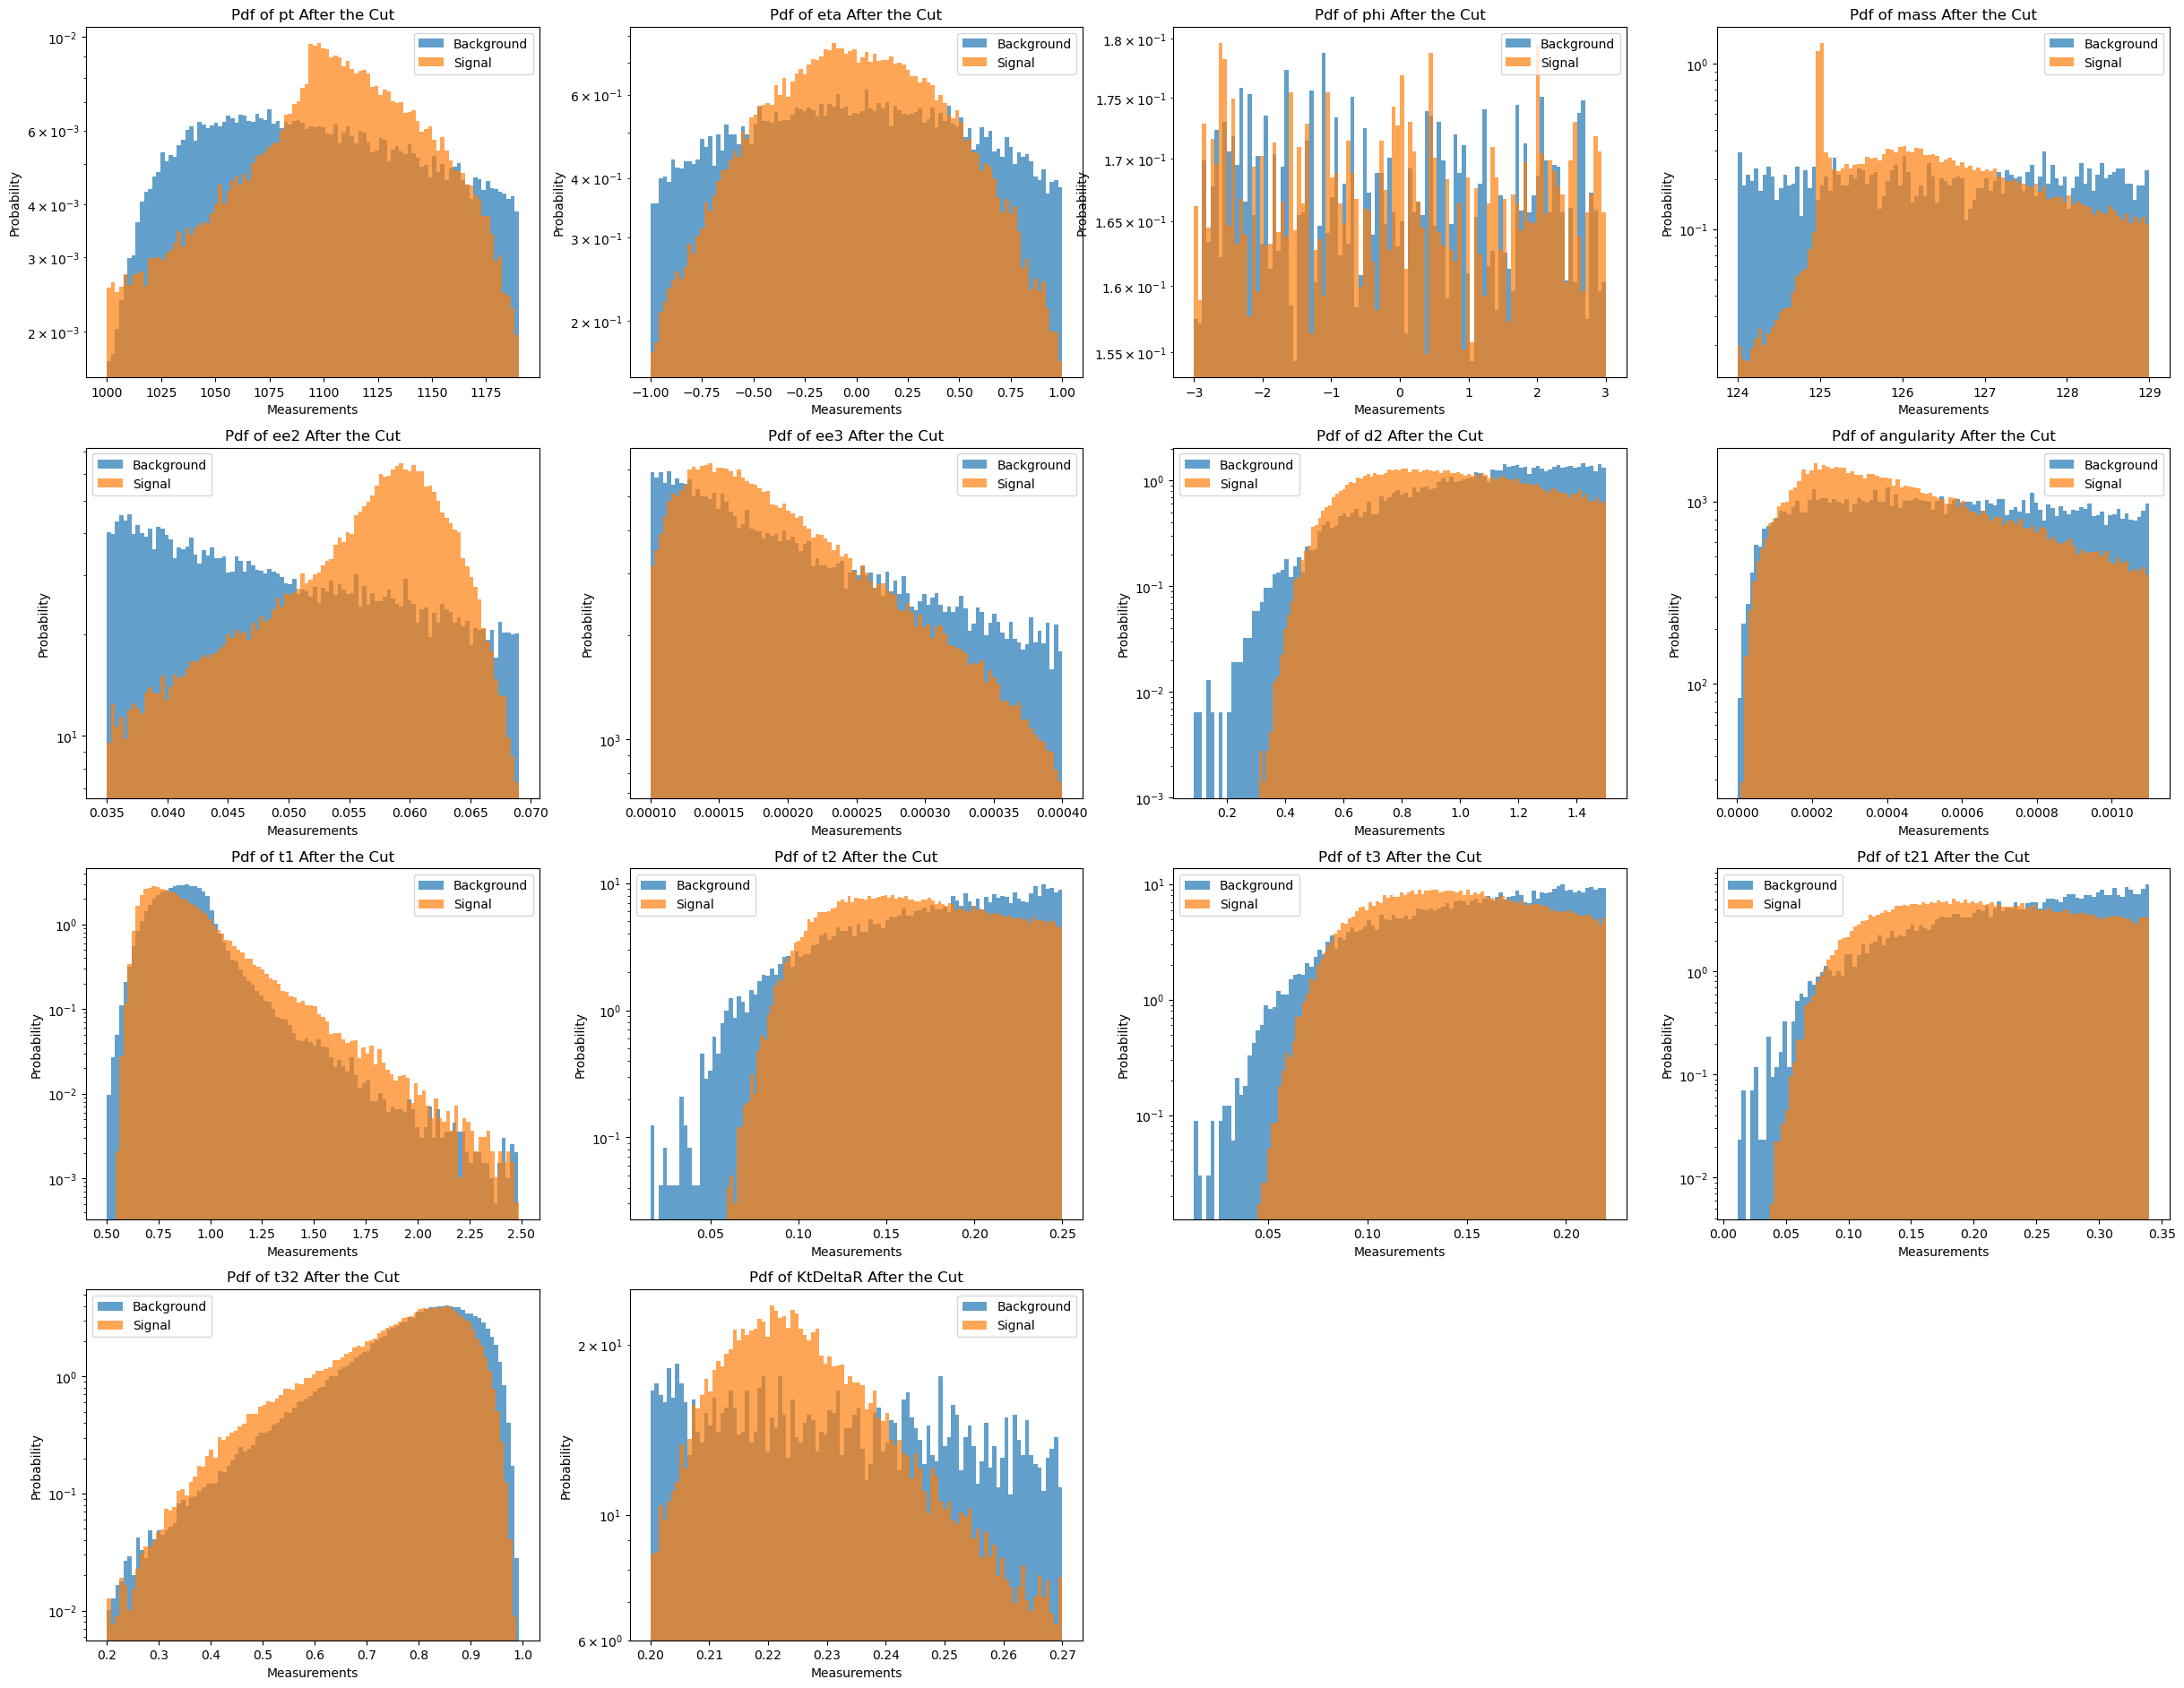

In [57]:
fig = plt.figure(figsize = (30, 60))
rows = 10
columns = 4
n = 1
lowerCut_list = [1000,-1,-3, 124, 0.035, 0.0001, 0, 0, 0.5, 0 , 0, 0, 0.2, 0.2]
upperCut_list = [1190, 1, 3, 129, 0.069, 0.0004, 1.5, 0.0011, 2.5, 0.25, 0.22, 0.34, 1, 0.27]
for x in range(0, 14):
    fig.add_subplot(rows, columns, n)
    n = n + 1
    title = higgs_dict.keys()[x]
    h_mask = (higgs_dict[title] > lowerCut_list[x]) & (higgs_dict[title] < upperCut_list[x])
    q_mask = (qcd_dict[title] > lowerCut_list[x]) & (qcd_dict[title] < upperCut_list[x])
    plt.title("Pdf of " + str(title) + ' After the Cut')
    plt.hist(qcd_dict[title][q_mask], bins = 100, density = True, alpha = 0.7)
    plt.hist(higgs_dict[title][h_mask], bins = 100, density = True, alpha = 0.7)
    plt.legend(['Background', 'Signal'])
    plt.xlabel('Measurements')
    plt.ylabel('Probability')
    plt.yscale('log')

These are the set of histograms of features after my optimal cuts.

## Problem 7.4

1. Mass -> 4.27 significance after [124, 129] cut <br>
2. d2 -> 2.08 significance after [0, 40] cut <br>
3. t2 -> 2.03 significance after [0.06, 0.6] cut <br>

In [206]:
massLowCut = 125
massHighCut = 130

d2LowCut = 0
d2HighCut = 40

t2LowCut = 0.06
t2HighCut = 0.6

mask1 = (higgs_dict['mass'] > massLowCut) & (higgs_dict['mass'] < massHighCut)\
& (higgs_dict['t2'] > t2LowCut) & (higgs_dict['t2'] < t2HighCut)\
& (higgs_dict['d2'] > d2LowCut) & (higgs_dict['d2'] < d2HighCut)\

n_higgs = higgs_dict[mask1].shape[0]/2000

mask2 = (qcd_dict['mass'] > massLowCut) & (qcd_dict['mass'] < massHighCut)\
& (qcd_dict['t2'] > t2LowCut) & (qcd_dict['t2'] < t2HighCut)\
& (qcd_dict['d2'] > d2LowCut) & (qcd_dict['d2'] < d2HighCut)\

n_qcd = qcd_dict[mask2].shape[0]/50

print("Number of Higgs: " + str(n_higgs))
print("Number of Qcd: " + str(n_qcd))
print("Total Events: " + str(n_higgs + n_qcd))
print('Approximated Sigma : ' + str(n_higgs/np.sqrt(n_qcd)))

mean = n_qcd
d = stats.poisson(mean)
probability = d.sf(n_higgs + n_qcd)
sigma = stats.norm.ppf(1 - probability)
print('Poisson Sigma = ' + str(sigma))

Number of Higgs: 32.6025
Number of Qcd: 29.36
Total Events: 61.9625
Approximated Sigma : 6.01690116820241
Poisson Sigma = 5.19086258916292


After mass, d2, and t2 cuts, my significance of the signal is now 5.2. My partner got 4.6 expected sigma after cutting on features such as mass, d2, t2, and t21. My partner did four features cut whereas I did only three feature cuts.

# Lab 8

In [15]:
dH = h5py.File('data_highLumi_pt_1000_1200.h5', 'r')
dL = h5py.File('data_lowLumi_pt_1000_1200.h5', 'r')

In [16]:
highData = pd.read_hdf('./data_highLumi_pt_1000_1200.h5')
highData

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1014.701381,0.320861,1.662700,237.429321,0.119700,0.002641,1.539811,0.008410,1.020637,0.284296,0.259425,0.278548,0.912517,0.356557
1,1040.093465,-0.402904,0.657100,137.024953,0.028117,0.000290,13.035447,0.007623,0.924653,0.883464,0.682923,0.955454,0.773007,0.032092
2,1023.915889,-0.157793,1.352514,161.716106,0.046337,0.000674,6.771647,0.009618,0.938172,0.743193,0.663864,0.792171,0.893260,0.178641
3,1079.532839,-1.356773,-0.683310,85.629307,0.011316,0.000039,27.146507,0.000455,1.033940,0.927058,0.855880,0.896626,0.923222,0.010303
4,1167.522933,0.032726,-1.440446,345.520406,0.156304,0.006467,1.693575,0.011564,0.940346,0.555762,0.382950,0.591018,0.689055,0.349341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1090.490389,-0.383384,0.580866,315.865016,0.148747,0.004730,1.437327,0.008757,0.899599,0.220003,0.165191,0.244556,0.750857,0.463219
4062,1024.261156,0.782132,-1.597681,114.142976,0.020067,0.000148,18.339293,0.003206,0.914173,0.848558,0.782821,0.928225,0.922531,0.015276
4063,1018.257604,0.658496,0.893016,55.924149,0.017371,0.000030,5.665910,0.001219,0.752979,0.345601,0.312060,0.458978,0.902950,0.092592
4064,1198.680592,0.307368,-1.514498,107.594697,0.015019,0.000039,11.637634,0.003877,0.605913,0.216714,0.203449,0.357665,0.938791,0.652686


In [17]:
lowData = pd.read_hdf('./data_lowLumi_pt_1000_1200.h5')
lowData

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1019.103763,-0.126256,0.971333,606.144181,0.366305,0.045408,0.923857,0.032897,0.853694,0.363566,0.159485,0.425874,0.438667,0.927449
1,1097.722115,-1.026775,-1.318647,136.198997,0.046489,0.000372,3.702281,0.000907,0.909950,0.650283,0.490157,0.714635,0.753759,0.100155
2,1109.516013,0.147645,1.301173,269.369966,0.129854,0.002386,1.089623,0.005363,1.247856,0.230705,0.181573,0.184881,0.787038,0.407922
3,1154.910626,0.836038,0.272040,293.627489,0.095157,0.003254,3.776053,0.010163,0.753989,0.462067,0.304606,0.612829,0.659226,0.298514
4,1106.100328,0.150553,2.831497,174.127072,0.070252,0.000545,1.572763,0.005132,0.785784,0.124047,0.099418,0.157864,0.801454,0.277085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1125.085037,0.133820,1.415696,176.161322,0.085318,0.000918,1.477743,0.002779,1.082724,0.487478,0.376681,0.450233,0.772714,0.262421
438,1142.878511,-0.563646,-1.692034,242.973633,0.088217,0.001946,2.833835,0.009067,0.829291,0.469421,0.314822,0.566051,0.670660,0.256362
439,1146.873619,-0.641382,-0.941524,216.690343,0.070246,0.001387,4.000989,0.004606,0.830399,0.583299,0.420644,0.702431,0.721147,0.123462
440,1142.946359,-0.424503,-2.159985,96.195083,0.012807,0.000057,27.062195,0.004242,0.923514,0.812622,0.767647,0.879924,0.944654,0.011240


## Problem 8.1

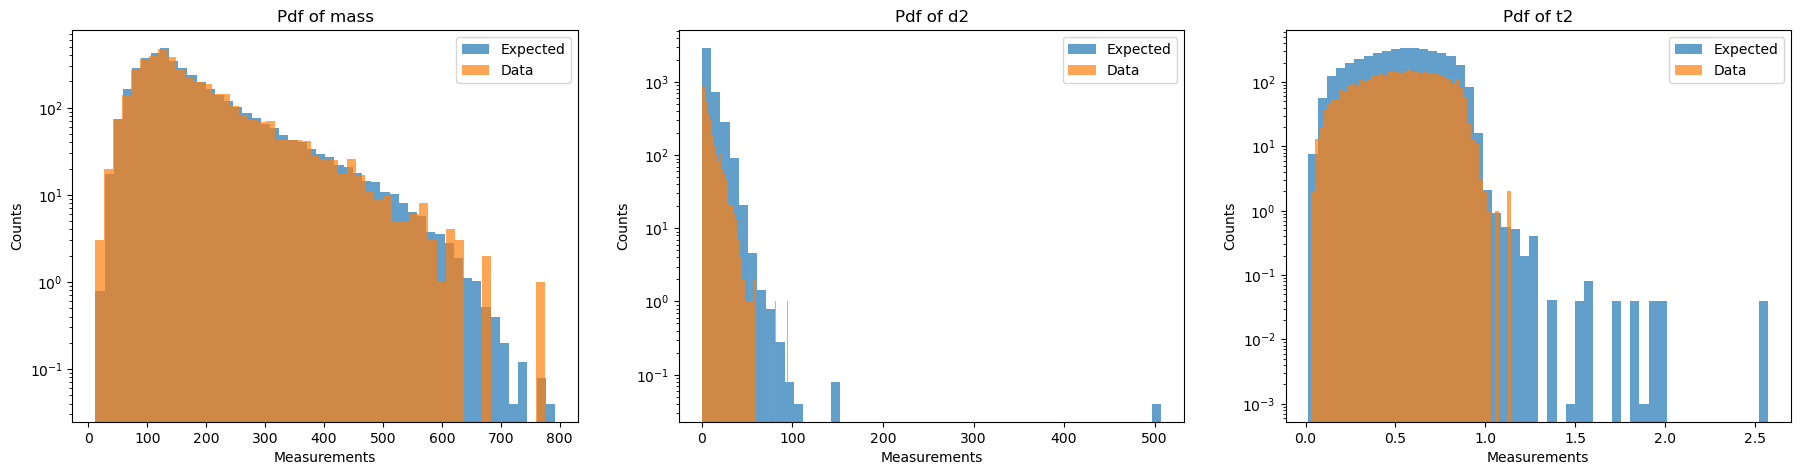

In [165]:
fig = plt.figure(figsize = (30, 60))
rows = 10
columns = 4
n = 1
total = higgs_dict.append(qcd_dict)
qw = (4066/100000) / 1.025
hw = qw / 40

feature_list = ['mass', 'd2', 't2']
for x in feature_list:
    fig.add_subplot(rows, columns, n)
    n = n + 1
    title = x
    higgs_w = np.ones_like(higgs_dict[title]) * hw
    qcd_w = np.ones_like(qcd_dict[title]) * qw
    weight = np.append(higgs_w, qcd_w)
    plt.hist(total[title], bins = 50, weights = weight, alpha = 0.7)
    plt.hist(highData[title], bins = 50, alpha = 0.7)
    plt.title("Pdf of " + str(title))
    plt.legend(['Expected', 'Data'])
    plt.xlabel('Measurements')
    plt.ylabel('Counts')
    plt.yscale('log')

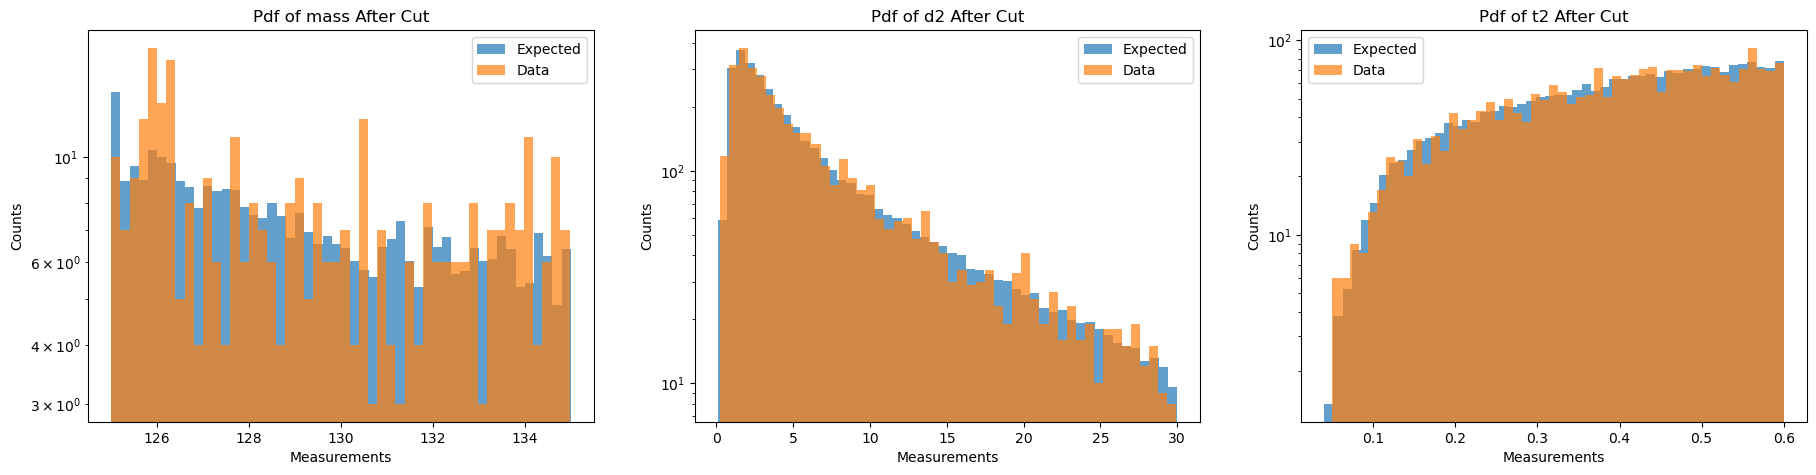

In [166]:
fig = plt.figure(figsize = (30, 60))
rows = 10
columns = 4
n = 1
a = 0

feature_list = ['mass', 'd2', 't2']
lowerCut_list = [125, 0, 0.04, 0.15]
upperCut_list = [135, 30, 0.6, 0.5]

for x in feature_list:
    fig.add_subplot(rows, columns, n)
    title = x
    mask1 = (higgs_dict[x] > lowerCut_list[a]) & (higgs_dict[x] < upperCut_list[a])
    mask2 = (qcd_dict[x] > lowerCut_list[a]) & (qcd_dict[x] < upperCut_list[a])
    mask3 = (highData[x] > lowerCut_list[a]) & (highData[x] < upperCut_list[a])
    h_cut = higgs_dict[x][mask1]
    q_cut = qcd_dict[x][mask2]
    data_cut = highData[x][mask3]
    total = h_cut.append(q_cut)
    qw = (data_cut.size/((h_cut.size/40)+q_cut.size))
    hw = qw / 40
    n = n + 1
    a = a + 1
    higgs_w = np.ones_like(h_cut) * hw
    qcd_w = np.ones_like(q_cut) * qw
    weight = np.append(higgs_w, qcd_w)
    plt.hist(total, bins = 50, weights = weight, alpha = 0.7)
    plt.hist(data_cut, bins = 50, alpha = 0.7)
    plt.title("Pdf of " + str(title) + ' After Cut')
    plt.legend(['Expected', 'Data'])
    plt.xlabel('Measurements')
    plt.ylabel('Counts')
    plt.yscale('log')

In [212]:
massLowCut = 125
massHighCut = 130

d2LowCut = 0
d2HighCut = 40

t2LowCut = 0.06
t2HighCut = 0.6

q_ratio = (n_qcd * 50) / 100000
print("Qcd Ratio: " + str(q_ratio))
expected_HighQcd = highData.shape[0] * q_ratio
print("Expected Number of Qcd: " + str(expected_HighQcd))

mask1 = (highData['mass'] > massLowCut) & (highData['mass'] < massHighCut)\
& (highData['t2'] > t2LowCut) & (highData['t2'] < t2HighCut)\
& (highData['d2'] > d2LowCut) & (highData['d2'] < d2HighCut)\

n_high = highData[mask1].shape[0]
print("Total: " + str(n_high))

probability = stats.poisson.cdf(k = n_high, mu = expected_HighQcd)
sigma = stats.norm.ppf(probability)
print('Observed Significance = ' + str(sigma))

Qcd Ratio: 0.01468
Expected Number of Qcd: 59.688880000000005
Total: 131
Observed Significance = 8.014015948775546


Using the total events (qcd + higgs) in high luminosity as the measurement and the expected number of qcd as the mean of the poisson distribution, I found the observed significance to be 8.01, which is much higher than what I expected from problem 7.4 which is 5.19.

## Problem 8.2

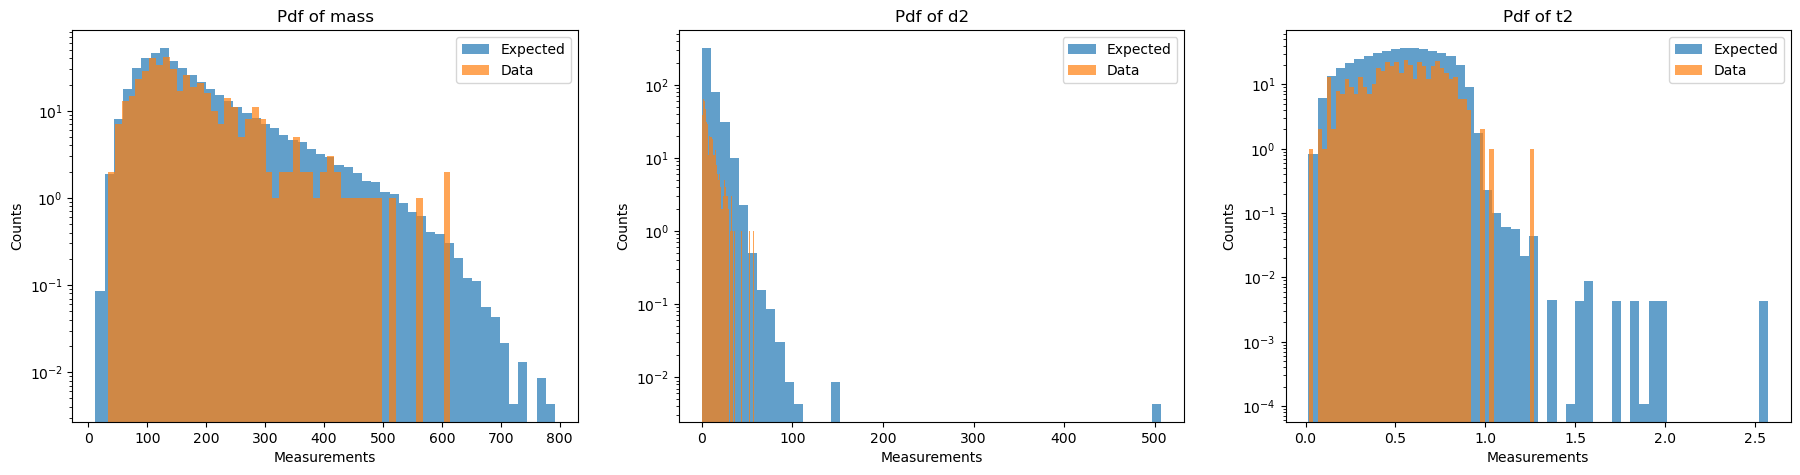

In [167]:
fig = plt.figure(figsize = (30, 60))
rows = 10
columns = 4
n = 1
total = higgs_dict.append(qcd_dict)
qw = (442/100000) / 1.025
hw = qw / 40

feature_list = ['mass', 'd2', 't2']
for x in feature_list:
    fig.add_subplot(rows, columns, n)
    n = n + 1
    title = x
    higgs_w = np.ones_like(higgs_dict[title]) * hw
    qcd_w = np.ones_like(qcd_dict[title]) * qw
    weight = np.append(higgs_w, qcd_w)
    plt.hist(total[title], bins = 50, weights = weight, alpha = 0.7)
    plt.hist(lowData[title], bins = 50, alpha = 0.7)
    plt.title("Pdf of " + str(title))
    plt.legend(['Expected', 'Data'])
    plt.xlabel('Measurements')
    plt.ylabel('Counts')
    plt.yscale('log')

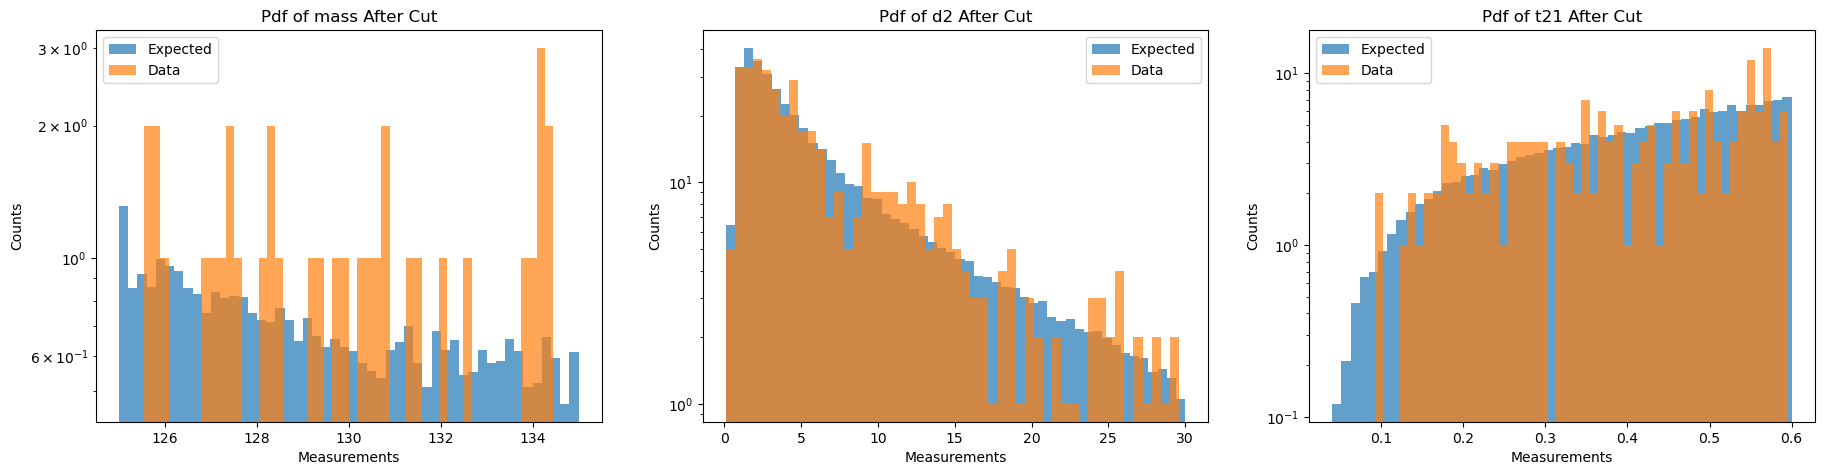

In [169]:
fig = plt.figure(figsize = (30, 60))
rows = 10
columns = 4
n = 1
a = 0

feature_list = ['mass', 'd2', 't21']
lowerCut_list = [125, 0, 0.04, 0.15]
upperCut_list = [135, 30, 0.6, 0.5]

for x in feature_list:
    fig.add_subplot(rows, columns, n)
    title = x
    mask1 = (higgs_dict[x] > lowerCut_list[a]) & (higgs_dict[x] < upperCut_list[a])
    mask2 = (qcd_dict[x] > lowerCut_list[a]) & (qcd_dict[x] < upperCut_list[a])
    mask3 = (lowData[x] > lowerCut_list[a]) & (lowData[x] < upperCut_list[a])
    h_cut = higgs_dict[x][mask1]
    q_cut = qcd_dict[x][mask2]
    data_cut = lowData[x][mask3]
    total = h_cut.append(q_cut)
    qw = (data_cut.size/((h_cut.size/40)+q_cut.size))
    hw = qw / 40
    n = n + 1
    a = a + 1
    higgs_w = np.ones_like(h_cut) * hw
    qcd_w = np.ones_like(q_cut) * qw
    weight = np.append(higgs_w, qcd_w)
    plt.hist(total, bins = 50, weights = weight, alpha = 0.7)
    plt.hist(data_cut, bins = 50, alpha = 0.7)
    plt.title("Pdf of " + str(title) + ' After Cut')
    plt.legend(['Expected', 'Data'])
    plt.xlabel('Measurements')
    plt.ylabel('Counts')
    plt.yscale('log')

High luminosity's expected signal and background are more similar than low luminosity's. As you can see from low luminosity's four features, the difference between expected signal and data is quite large compared to high luminosity's. At mass, the data isn't really follow the expected signal trend as well.

In [210]:
massLowCut = 125
massHighCut = 130

d2LowCut = 0
d2HighCut = 40

t2LowCut = 0.06
t2HighCut = 0.6

q_ratio = (n_qcd * 50) / 100000
print("Qcd Ratio: " + str(q_ratio))
expected_LowQcd = lowData.shape[0] * q_ratio
print("Expected Number of Qcd: " + str(expected_LowQcd))

mask1 = (lowData['mass'] > massLowCut) & (lowData['mass'] < massHighCut)\
& (lowData['t2'] > t2LowCut) & (lowData['t2'] < t2HighCut)\
& (lowData['d2'] > d2LowCut) & (lowData['d2'] < d2HighCut)\

n_low = lowData[mask1].shape[0]
print("Total: " + str(n_low))

probability = stats.poisson.cdf(k = n_low, mu = expected_LowQcd)
sigma = stats.norm.ppf(probability)
print('Observed Significance = ' + str(sigma))

Qcd Ratio: 0.01468
Expected Number of Qcd: 6.4885600000000005
Total: 12
Observed Significance = 2.148843816030202


Using the same method as high luminosity, I found the observed significance to be 2.15 which is significantly lower than 5 sigma threshold.

## Problem 8.3

In [177]:
print("Expected Number of Qcd (Mean): " + str(n_qcd))
expected_UpLim = stats.poisson(mu = n_qcd).ppf(0.95)
print("Expected 95% confidence level upper limit: " + str(expected_UpLim))

Expected Number of Qcd (Mean): 29.36
39.0


Given the expected number of qcd I calculated at problem 7.4, I used poisson distribution to find the upper 95% interval of low luminosity to be 39.

In [178]:
print("Observed Number of Qcd (Mean): " + str(expected_LowQcd))
observed_UpLim = stats.poisson(mu = expected_LowQcd).ppf(0.95)
print("Observed 95% confidence level upper limit: " + str(observed_UpLim))

Observed Number of Qcd (Mean): 6.4885600000000005
Observed 95% confidence level upper limit: 11.0


Given the expected number of qcd I calculated at problem 8.2, I used poisson distribution to find the upper 95% interval of low luminosity to be 11.

## Problem 8.4

In [194]:
probabilitiy = stats.norm.cdf(1)
One_sigma = stats.poisson(mu = n_qcd).ppf(0.68)
print("Expected One Sigma Uncertainty: +/-" + str(expected_UpLim - One_sigma))

Expected One Sigma Uncertainty: +/-7.0
